**Практическое задание** очевидно, что чем больше шаг градиентного спуска (параметр *eta0* класса *SGDRegressor*), тем быстрее мы придём к оптимальным значениям. Используя под выше, поиграйтесь с параметром *eta0* и добейтесь , чтобы градиентный спуск закончился быстрее, чем за 200 шагов.

Сколько шагов у вас получилось? Какое каччество *RMSE* у Вашего решения?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# для регрессии
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
%matplotlib inline

data = pd.read_csv('non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()

X = data['x_train'].values.reshape(-1, 1) # превращаем X из простого массива в вектор-столбец
y = data['y_train'].values

data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


In [11]:
def my_regression(X,y, eta0):
    # разбиваем на трейн и валидацию
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    sgd_regressor = SGDRegressor(learning_rate='constant', eta0=eta0, fit_intercept=True, random_state=42)
    w_current, epsilon = np.random.random(2), 0.0001
    weight_evolution, rmse_evolution = [], [] # изменения весов и ошибка на валидации
    for step in list(range(800)):
        sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
        weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
        if weight_evolution[-1]<epsilon:
            print("Итарации остановлены на шаге %d" % step); break
        rmse_evolution.append(mean_squared_error(y_valid, sgd_regressor.predict(X_valid)))
        w_current = sgd_regressor.coef_.copy()
    plt.plot(range(step), rmse_evolution)
    return mean_squared_error(y_valid, sgd_regressor.predict(X_valid)) 

Итарации остановлены на шаге 107
RMSE = 0.183023


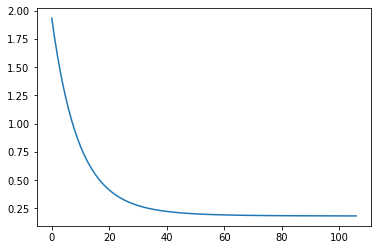

In [18]:
error = my_regression(X,y, eta0=0.02)
print("RMSE = %f" % error)